# Исследование объявлений о продаже квартир в СПБ

Доступен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

**Задача** — найти интересные особенности и зависимости, которые существуют на рынке недвижимости, чтобы выявить факторы, влияющие на рыночную стоимость объектов.



**Анализ построим в несколько этапов:** 
- изучим качество данных в массиве, посмотрим, есть ли пропущенные значения, решим, как с ними поступить, - убрать такие наблюдения из анализа или предложить адекватный способ их заполнения
- найдем явные / неявные дубликаты
- поработаем с типами переменных 
- изучим распределение значений в каждом параметре данных, при необходимости избавимся от аномальных значений, чтобы не исказить результаты
- при необходимости рассчитаем дополнительные параметры/метрики, которые будут целесообразны в рамках поставленной задачи
- проведем анализ взаимосвязей между отдельными показателями, в частности определим те параметры, которые оказывают максимальный эффект на стоимость квартиры и могут буть использованы для построения прогнозной модели определения стоимости квартиры



## Знакомство с данными

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [152]:
df = pd.read_csv('C:/Users/okald/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Всего 22 переменные, количество строк - 23699, при этом в большинстве переменных имеются пропущенные значения, которые предстоит обработать**

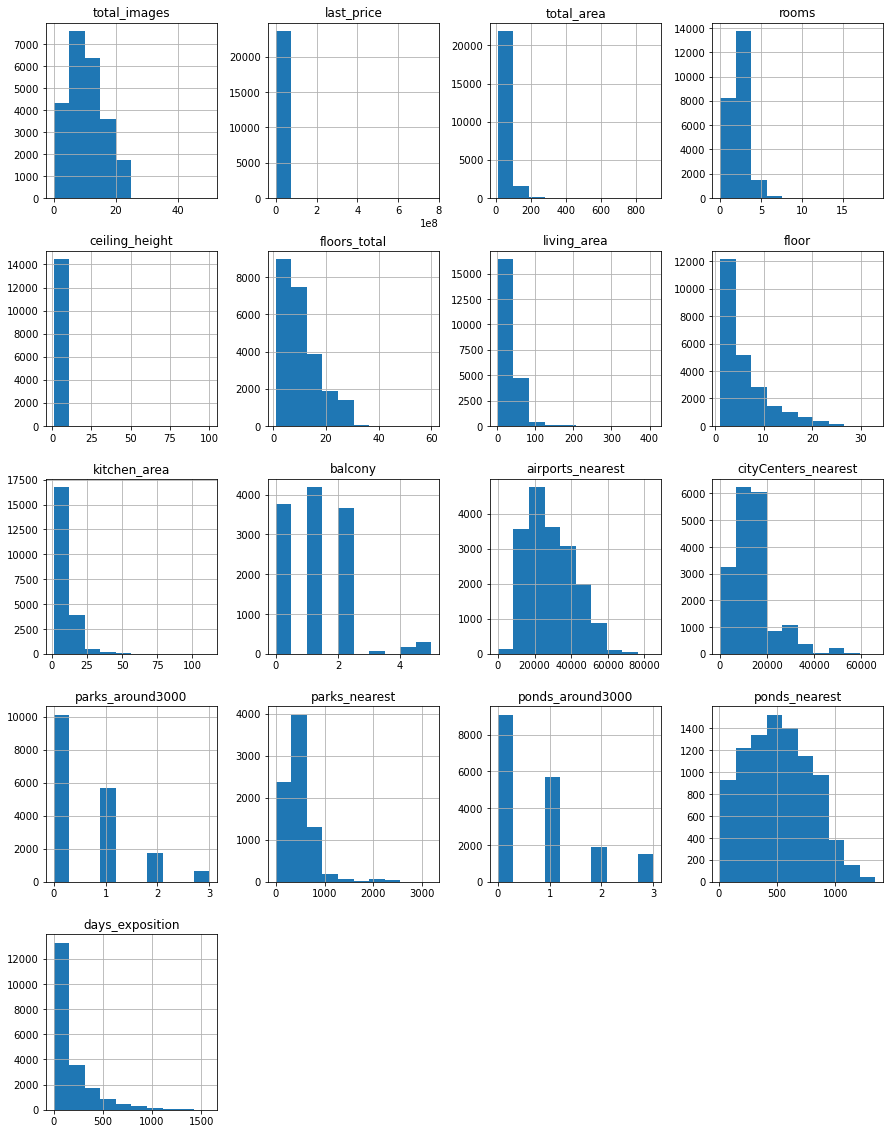

In [154]:
df.hist(figsize=(15, 20));

**Датафрейм содержит большое число пропущенных значений, с которыми предстоит поработать. Кроме того, по гистограммам отдельных  переменных очевидна высокая концентрация наблюдений в области низких значений, что также указывает на большое число аномальных значений (предстоит отбросить "хвосты" и посмотреть более внимательно на распределение уже очищенных данных).**

## Предобработка данных

### Обработка пропущенных значений

In [155]:
# Считаем количество пропусков по каждой переменной
pd.DataFrame(round(df.isna().sum())).style.background_gradient('coolwarm')

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9195
floors_total,86
living_area,1903
floor,0
is_apartment,20924


In [156]:
#Считаем долю пропусков по каждой переменной
pd.DataFrame(round(df.isna().mean()*100, 1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


**Максимальное количество пропусков - в колонке is_apartment (88%). Также значительное число пропусков в колонках ceiling_height и balcony. Так как ряд переменных не будут использованы в исследовании (is_apartment, parks_around3000, ponds_around3000, parks_nearest и т.п.), то оставим данные без изменений.**          

#### Столбец 'balcony'

**Исходим из того, что если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски заменим на 0.** 

In [157]:
# Заполним пропуски нулями 
df['balcony']= df['balcony'].fillna(0)
display(df['balcony'].isna().sum())

0

In [158]:
df['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

**Посмотрим на получившееся распределение значений: в большинстве объявлений балконов или нет, или они не указаны**

In [159]:
df['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

#### Столбец 'is_apartment'

In [160]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].unique()

array([False,  True])

**Заменили пропуски на False. Но вообще с учетом такого количества пропущенных значений в колонке (88% пропусков) делать замену и по ее итогам проводить анализ нецелесообразно. Эта колонка в дальнейшем анализе не участвует.**

#### Столбец 'floors_total'

In [161]:
df['floor'].isna().sum() 

0

**Во всех объявлениях указан этаж квартиры. При этом может быть не указана этажность дома. Такие пропуски заменим этажом квартиры.**

In [162]:
df[df['floors_total'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,False,...,12.00,0.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,False,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,False,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,False,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,False,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


**Проверим значение для конкретного объявления (строка с номером 186) в колонке floors_total до и после заполнения пропусков.** 

In [163]:
df['floors_total'].iloc[186] 

nan

In [164]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])


In [165]:
df['floors_total'].iloc[186] 

4.0

#### Столбец 'locality_name'

In [166]:
df['locality_name'].isna().sum()

49

In [167]:
df['locality_name'] = df['locality_name'].fillna('unknown')
df['locality_name'].nunique()

365

**Пропусков не много, заполним их просто значением 'unknown'**

#### Столбец 'living_area'

In [168]:
df.pivot_table(index='rooms', values = ['living_area', 'total_area'], aggfunc = ['median','count'])


median                  count           
      living_area total_area living_area total_area
rooms                                              
0          18.000      26.05         183        197
1          17.600      36.56        7388       8047
2          30.500      53.00        7296       7940
3          45.000      73.00        5366       5814
4          63.600      99.30        1089       1180
5          91.785     146.45         292        326
6         123.900     184.30          99        105
7         145.000     214.00          53         59
8         161.000     235.70          12         12
9         179.200     300.95           7          8
10        161.400     272.60           3          3
11        133.900     188.90           2          2
12        409.700     900.00           1          1
14        195.150     304.20           2          2
15        409.000     590.00           1          1
16        180.000     270.00           1          1
19        264.500     374.60           1          1

**Сравнение по 'count' 2 столбцов (living_area и total_area) дает представление не только о наличии пропусков, но и об их распределении в зависимости от числа комнат. Заполним пропуски в колонке living_area медианным значением жилой прощади в зависимости от количества комнат.**

In [169]:
for t in df['rooms'].unique():
    df.loc[(df['rooms'] == t) & (df['living_area'].isna()), 'living_area'] = \
    df.loc[(df['rooms'] == t), 'living_area'].median()

In [170]:
df['living_area'].isna().sum() 

0

#### Столбец 'kitchen_area'

In [171]:
df['kitchen_area'].isna().sum() 

2278

In [172]:
df.pivot_table(index='rooms', values = 'kitchen_area', aggfunc = ['median','count'])


,median,count
,kitchen_area,kitchen_area
rooms,,
1,9.04,7213
2,8.80,7286
3,9.50,5380
4,11.10,1081
5,15.10,285
6,19.50,97
7,20.00,52
8,25.00,9


**Там где кол-во комнат равно 0, везде размер кухни не указан. Логично предположить, что это либо квартиры-студии, где кухня в отдельную комнату не выделена, либо это объявление о продаже комнаты в квартире. Присвоим таким значениям размера кухни 0 (таких строк 197)**

In [173]:
len(df.loc[(df['kitchen_area'].isna()) & (df['rooms']==0)])

197

In [174]:
df.loc[(df['kitchen_area'].isna()) & (df['rooms']==0), 'kitchen_area'] = df['kitchen_area'].fillna(0)

In [175]:
len(df[(df['kitchen_area'].isna())])

2081

**Остальным 2081 строкам с пустыми значениями в kitchen_area присвоим медианное значение кухни в зависимости от размера квартиры**


In [176]:
for t in df['rooms'].unique():
    df.loc[(df['rooms'] == t) & (df['kitchen_area'].isna()), 'kitchen_area'] = \
    df.loc[(df['rooms'] == t), 'kitchen_area'].median()

In [177]:
df['rooms'].isna().sum()

0

**Оценим на реалистичность результат по итогам замены пропусков в колонках 'kitchen_area', 'living_area', а заодно убедимся, что не осталось пропусков**

In [178]:
df.pivot_table(index='rooms', values = ['kitchen_area', 'living_area'], aggfunc = ['median','count'])

median                    count            
      kitchen_area living_area kitchen_area living_area
rooms                                                  
0             0.00      18.000          197         197
1             9.04      17.600         8047        8047
2             8.80      30.500         7940        7940
3             9.50      45.000         5814        5814
4            11.10      63.600         1180        1180
5            15.10      91.785          326         326
6            19.50     123.900          105         105
7            20.00     145.000           59          59
8            25.00     161.000           12          12
9            14.30     179.200            8           8
10           19.80     161.400            3           3
11           12.60     133.900            2           2
12          112.00     409.700            1           1
14           21.25     195.150            2           2
15          100.00     409.000            1           1
16           13.00     180.000            1           1
19           27.60     264.500            1           1

#### Столбец 'ceiling_height'

**Так как высота потолка не зависит, напр. от размера квартиры или этажа, то пропуски просто заполним медианным значением данной переменной**

In [179]:
df['ceiling_height'].isna().sum()

9195

In [180]:
# Заменим пропуски медианными значениями высоты потолков в зависимости от района
for locality_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == locality_name, 'ceiling_height'].median()
    df.loc[(df['ceiling_height'].isna()) & (df['locality_name'] == locality_name), 'ceiling_height'] = median

In [181]:
# Повторная проверка на оставшиеся пропуски - остается 121 пропуск
df['ceiling_height'].isna().sum()

121

In [182]:
# Оставшиеся пропуски заполняем общей медианой по Лен. области
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()
df['ceiling_height'].isna().sum()

0

#### Столбец 'days_exposition'

**'days_exposition' - сколько дней было размещено объявление (от публикации до снятия)**

In [183]:
df['days_exposition'].isna().sum()

3181

In [184]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Минимальная длительность активности объявления - 1 день, максимальная - 1580 дней (это более 4 лет!!!). При этом половина всех объявлений активна 3 месяца (квартира или продается или объявление снимают).**
**Вряд ли квартира продается 4 года. Видимо, объявления с такой долгой экспозицией - просто мусор, которые забыли удалить**  

**Попробуем проанализировать, есть ли зависимость пропусков в данных по дате выставления объявления от сроков его активности? Стали ли квартиры продаваться быстрее / дольше в рамках изучаемого временного периода?** 

**Для этого заранее переведем формат ячейки 'first_day_exposition' (дата публикации объявления) к формату to_datetime и создадим новый столбец с годом подачи объявления 'year_number'**

In [185]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['year_number'] = df['first_day_exposition'].astype('datetime64[M]').dt.year
df['year_number'].unique() 

array([2019, 2018, 2015, 2017, 2016, 2014], dtype=int64)

In [186]:
#Период данных из анализируемого архива объявлений
df['first_day_exposition'].sort_values()

10132   2014-11-27
8393    2014-11-27
15857   2014-11-27
2831    2014-11-27
696     2014-11-27
           ...    
10917   2019-05-03
5986    2019-05-03
9217    2019-05-03
21887   2019-05-03
15072   2019-05-03
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

**Есть полные данные за 4 года (2015-2018), фактически только за 1 последний месяц 2014г. и 2 первых месяца 2019**

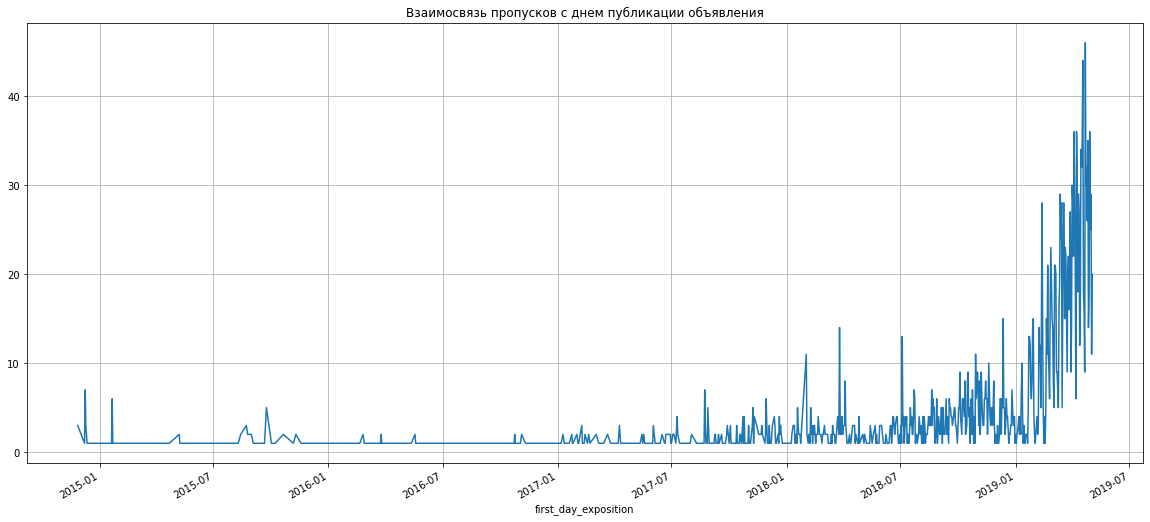

In [187]:
df.query('days_exposition.isna()')\
    .groupby('first_day_exposition')['last_price'].count()\
    .plot(x='Кол-во пропусков', \
          y='days_exposition', \
          title = 'Взаимосвязь пропусков с днем публикации объявления', \
          grid=True, figsize = (20,9));

**Как следует из графика, основная доля пропусков приходится на последний год в выборке. Это может указывать на то, что это квартиры, которые еще не проданы на момент выгрузки данных для анализа.
Заполним эти пропуски медианным значением по 'days_exposition' для каждого года публикации объявления.**

In [188]:
df.pivot_table(index = 'year_number', values = 'days_exposition', aggfunc = ['median', 'count'])

,median,count
,days_exposition,days_exposition
year_number,,
2014,875.0,119
2015,576.0,1121
2016,235.0,2716
2017,103.0,7919
2018,64.0,7560
2019,23.0,1083


In [189]:
for t in df['year_number'].unique():
    df.loc[(df['days_exposition'].isna()) & (df['year_number']==t), 'days_exposition'] =\
    df.loc[(df['year_number']==t), 'days_exposition'].median()

In [190]:
df['days_exposition'].isna().sum()

0

#### Столбец 'cityCenters_nearest'

In [191]:
df['cityCenters_nearest'].isna().sum()

5519

**В колонке  'cityCenters_nearest' много пропусков, при этом есть населенные пункты (н/п), у которых во всех объявлениях отсутствует расстояние до центра. Поэтому заполнить NAN-ы медианным значением расстояния до центра для каждого н/п не получится** 

**Пока оставим эти пропуски как есть**

In [192]:
df[['locality_name', 'cityCenters_nearest']][df['locality_name']=='Бокситогорск']

,locality_name,cityCenters_nearest
638,Бокситогорск,NaN
764,Бокситогорск,NaN
1053,Бокситогорск,NaN
1761,Бокситогорск,NaN
3010,Бокситогорск,NaN
3731,Бокситогорск,NaN
5821,Бокситогорск,NaN
8630,Бокситогорск,NaN
8767,Бокситогорск,NaN
8779,Бокситогорск,NaN


#### Проверка на наличие явных дубликатов

In [193]:
df.duplicated().sum() 

0

### Изменение типа данных

In [194]:
df['balcony']= df['balcony'].astype(int)
df['last_price'] = df['last_price'].astype(int)
df['floors_total'] = df['floors_total'].astype(int)
df['locality_name'] = df['locality_name'].astype('string')
df['days_exposition'] = df['days_exposition'].astype(int)

**Переменные balcony, last_price, floors_total, days_exposition по сути своей являются целыми числами, поэтому к такому формату их и приводим.**
**Аналогично - колонка locality_name: в ней содержится текст, поэтому для экономии памяти также приводим к типу string**

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

### Обработка неявных дубликатов (в названиях населенных пунктов)

In [196]:
# Архив содержит 365 "уникальных" названий населенных пунктов
df['locality_name'].nunique()

365

In [197]:
df['locality_name'].unique()

<StringArray>
[          'Санкт-Петербург',            'посёлок Шушары',
 'городской посёлок Янино-1',         'посёлок Парголово',
            'посёлок Мурино',                 'Ломоносов',
                 'Сертолово',                  'Петергоф',
                    'Пушкин',           'деревня Кудрово',
 ...
   'деревня Большое Рейзино',   'деревня Малая Романовка',
       'поселок Дружноселье',            'поселок Пчевжа',
       'поселок Володарское',            'деревня Нижняя',
 'коттеджный посёлок Лесное',         'деревня Тихковицы',
    'деревня Борисова Грива',      'посёлок Дзержинского']
Length: 365, dtype: string

In [198]:
#Сделаем самые очевидные замены на написании названий н/п для исключения неявных дубликатов
df['locality_name']=df['locality_name'].str.replace('ё','е')
df['locality_name']=df['locality_name'].str.replace('поселок городского типа','поселок')
df['locality_name']=df['locality_name'].str.replace('городской поселок','поселок')
df['locality_name']=df['locality_name'].str.replace('поселок при железнодорожной станции','поселок')
df['locality_name']=df['locality_name'].str.replace('поселок станции','поселок')
df['locality_name']=df['locality_name'].str.replace('коттеджный поселок','поселок')
df['locality_name']=df['locality_name'].str.replace('садоводческое некоммерческое товарищество','ст')
df['locality_name']=df['locality_name'].str.replace('садовое товарищество','ст')

In [199]:
# Количество уникальных названий н/п сократилось до 319
df['locality_name'].nunique()

319

 ### Обработка аномалий / выбросов

#### Столбец 'rooms'

In [200]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

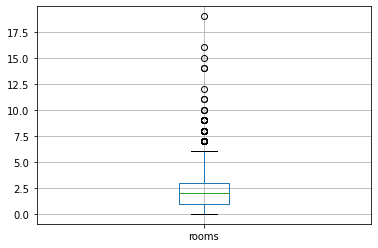

In [201]:
df.boxplot('rooms');

**Начиная с 6-ти комнатных квартир число наблюдений в данных резко падает. С учетом редкости таких крупных объектов на рынке в целом и их незначительного числа в датафрейме  в частности, их можно рассматривать как выбросы и исключить из датафрейма.**

**Срез покажет, сколько строк в массиве соответмтвуют квартирам с 6+ комнатами**


In [202]:
df.query('rooms>5').count()[0]

195

**Будем избавляемся от аномальных значений rooms:** 
**df = df.query('rooms<6')**

#### Столбец 'ceiling_height'

In [203]:
df['ceiling_height'].sort_values().unique()

array([  1.   ,   1.2  ,   1.75 ,   2.   ,   2.2  ,   2.25 ,   2.3  ,
         2.34 ,   2.4  ,   2.45 ,   2.46 ,   2.47 ,   2.48 ,   2.49 ,
         2.5  ,   2.51 ,   2.515,   2.52 ,   2.525,   2.53 ,   2.54 ,
         2.55 ,   2.555,   2.56 ,   2.56 ,   2.57 ,   2.575,   2.58 ,
         2.59 ,   2.6  ,   2.6  ,   2.61 ,   2.615,   2.62 ,   2.625,
         2.63 ,   2.64 ,   2.65 ,   2.65 ,   2.66 ,   2.67 ,   2.675,
         2.68 ,   2.69 ,   2.7  ,   2.71 ,   2.72 ,   2.725,   2.73 ,
         2.74 ,   2.75 ,   2.76 ,   2.77 ,   2.78 ,   2.79 ,   2.8  ,
         2.81 ,   2.82 ,   2.83 ,   2.84 ,   2.85 ,   2.86 ,   2.87 ,
         2.875,   2.88 ,   2.89 ,   2.9  ,   2.91 ,   2.92 ,   2.93 ,
         2.94 ,   2.95 ,   2.96 ,   2.97 ,   2.98 ,   2.99 ,   3.   ,
         3.01 ,   3.02 ,   3.03 ,   3.04 ,   3.05 ,   3.06 ,   3.07 ,
         3.08 ,   3.09 ,   3.1  ,   3.11 ,   3.12 ,   3.13 ,   3.14 ,
         3.15 ,   3.16 ,   3.17 ,   3.18 ,   3.2  ,   3.21 ,   3.22 ,
         3.23 ,   3.

In [204]:
len(df.query('ceiling_height>=20 and ceiling_height<=100'))

24

**Для значений потолков выше 20 метров (их 23) могла быть допущена ошибка (значение дано в см., а не в метрах). Такие значения можно перевести в см**

In [205]:
df.loc[(df['ceiling_height']>=10) & (df['ceiling_height']<=100), 'ceiling_height'] = df['ceiling_height']/10

In [206]:
df['ceiling_height'].sort_values().unique()

array([ 1.   ,  1.03 ,  1.2  ,  1.385,  1.4  ,  1.75 ,  2.   ,  2.2  ,
        2.25 ,  2.26 ,  2.3  ,  2.34 ,  2.4  ,  2.45 ,  2.46 ,  2.47 ,
        2.48 ,  2.49 ,  2.5  ,  2.51 ,  2.515,  2.52 ,  2.525,  2.53 ,
        2.54 ,  2.55 ,  2.555,  2.56 ,  2.56 ,  2.57 ,  2.575,  2.58 ,
        2.59 ,  2.6  ,  2.6  ,  2.61 ,  2.615,  2.62 ,  2.625,  2.63 ,
        2.64 ,  2.65 ,  2.65 ,  2.66 ,  2.67 ,  2.675,  2.68 ,  2.69 ,
        2.7  ,  2.71 ,  2.72 ,  2.725,  2.73 ,  2.74 ,  2.75 ,  2.76 ,
        2.77 ,  2.78 ,  2.79 ,  2.8  ,  2.81 ,  2.82 ,  2.83 ,  2.84 ,
        2.85 ,  2.86 ,  2.87 ,  2.875,  2.88 ,  2.89 ,  2.9  ,  2.91 ,
        2.92 ,  2.93 ,  2.94 ,  2.95 ,  2.96 ,  2.97 ,  2.98 ,  2.99 ,
        3.   ,  3.01 ,  3.02 ,  3.03 ,  3.04 ,  3.05 ,  3.06 ,  3.07 ,
        3.08 ,  3.09 ,  3.1  ,  3.11 ,  3.12 ,  3.13 ,  3.14 ,  3.15 ,
        3.16 ,  3.17 ,  3.18 ,  3.2  ,  3.21 ,  3.22 ,  3.23 ,  3.24 ,
        3.25 ,  3.26 ,  3.27 ,  3.28 ,  3.29 ,  3.3  ,  3.31 ,  3.32 ,
      

In [207]:
# Стандартные "круглые" значения высоты потолков встречаются больше всего, нестандартные значения (напр., 2.48 м) реже
df.groupby('ceiling_height')['ceiling_height'].count().head(20)

ceiling_height
1.000       1
1.030       1
1.200       1
1.385       3
1.400       1
1.750       1
2.000      12
2.200       1
2.250       1
2.260       1
2.300       4
2.340       1
2.400      24
2.450      15
2.460       2
2.470       3
2.480       8
2.490       1
2.500    4167
2.510      34
Name: ceiling_height, dtype: int64

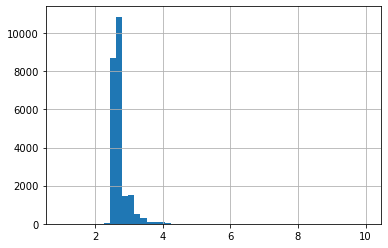

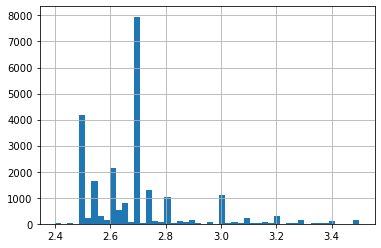

In [208]:
df['ceiling_height'].hist(bins = 50)
plt.show();
df['ceiling_height'].hist(bins = 50, range = (2.4,3.5));

In [209]:
df.query('ceiling_height<=3.5 and ceiling_height>=2.4').count()[0]

23377

**Единичные наблюдения с высотой потолка менее 2,4 м и более 3,5 м. Можем их отбросить, т.к. их число незначительно (1,29% от оригинальной выборки)** 

In [210]:
round(100-len(df.query('ceiling_height<=3.5 and ceiling_height>=2.4')) / len(df)*100,2)

1.36

**Будем избавляемся от аномальных значений высоты потолка:** 

**df = df.query('ceiling_height<=3.5 and ceiling_height>=2.4')**

#### Столбец 'last_price'

In [211]:
display(df['last_price'].min())
display(df['last_price'].median())
display(df['last_price'].mean())
df['last_price'].max()

12190

4650000.0

6541548.771551542

763000000

**Медианная цена - 4,65 млн., средняя - 6,5 млн. Максимум - 763 млн. Минимум - 12 190 руб. Очевидно, что есть аномальные значения, от которых надо избавиться.**

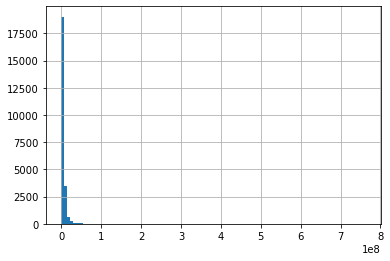

In [212]:
df['last_price'].hist( bins=100);

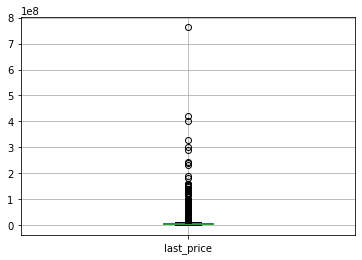

In [213]:
df.boxplot('last_price');

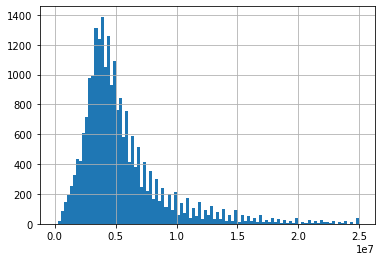

In [214]:
df['last_price'].hist(range =(12100, 25000000), bins=100);

**Если сделаем такой срез, то отбросим 464 наблюдения (менее 2% данных), что приемлемо.**

In [215]:
df.query('last_price>25000000').count()[0]

464

**Будем избавляемся от аномальных значений last_price:** 

**df=df.query('last_price<=25000000 and last_price>12190')**

#### Столбец 'days_exposition'

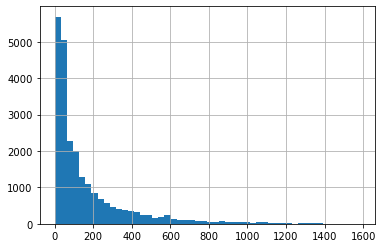

In [216]:
df['days_exposition'].hist(bins=50);

**По гистограмме видно, что после отметки 800 дней количество наблюдений практически сливается с нулем. Будем убирать такие наблюдения (в датасете их 609). Кроме того, следуя общей логике, вряд ли квартиры продаются по 2 года и более.** 

In [217]:
df.query('days_exposition>800').count()[0]

609

**Будем избавляемся от аномальных значений days_exposition:** 

**df=df.query('days_exposition<800')**

#### Столбец 'living_area'

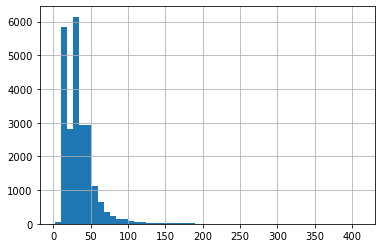

In [218]:
df['living_area'].hist(bins=50);

**По гистограмме видно, что после отметки 120 кв.м количество наблюдений практически сливается с нулем. Будем убирать такие наблюдения (в датасете их 229). Кроме того, ранее мы решили исключить из анализа квартиры с 6 и более комнатами. Поэтому частично данные отсекутся на срезе по числу комнат. Срезом по жилой площади мы лишь дополнительно подчистим данные.** 

In [219]:
df.query('living_area>120').count()[0]

229

In [220]:
df.pivot_table(index='rooms', values = 'living_area', aggfunc = 'median').head(7)

,living_area
rooms,
0,18.000
1,17.600
2,30.500
3,45.000
4,63.600
5,91.785
6,123.900


**Будем избавляемся от аномальных значений living_area:** 

**df=df.query('living_area<=120')**

#### Столбец 'total_area'

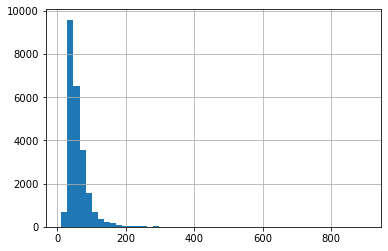

In [221]:
df['total_area'].hist(bins=50);

**По гистограмме видно, что после отметки 200 кв.м количество наблюдений практически сливается с нулем. Будем убирать такие наблюдения. Логика аналогична той, что использовали для living_area.** 

In [222]:
df.query('total_area>200').count()[0]

227

**Будем избавляемся от аномальных значений total_area:**

**df=df.query('total_area<=200')**

***ИТОГО мы собрали необходимые условия для исключения аномальных значений из датафрейма.***



**Проверим, сколько строк останется при такой обрезке массива данных**

In [223]:
round(df.query('rooms<6 and \
    ceiling_height<=3.5 and ceiling_height>=2.4 and \
    last_price<=25000000 and last_price>12190 and \
    days_exposition<800 and\
    living_area<=120 and\
    total_area<=200')\
    .count()[0] / len(df)*100)

94

**Останется 94% от оригинального размера массива. Потеря 6% данных - приемлема**

In [224]:
df = (
    df.query('rooms<6 and \
    ceiling_height<=3.5 and ceiling_height>=2.4 and \
    last_price<=25000000 and last_price>12190 and \
    days_exposition<800 and\
    living_area<=120 and total_area<=220')
)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22266 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22266 non-null  int64         
 1   last_price            22266 non-null  int32         
 2   total_area            22266 non-null  float64       
 3   first_day_exposition  22266 non-null  datetime64[ns]
 4   rooms                 22266 non-null  int64         
 5   ceiling_height        22266 non-null  float64       
 6   floors_total          22266 non-null  int32         
 7   living_area           22266 non-null  float64       
 8   floor                 22266 non-null  int64         
 9   is_apartment          22266 non-null  bool          
 10  studio                22266 non-null  bool          
 11  open_plan             22266 non-null  bool          
 12  kitchen_area          22266 non-null  float64       
 13  balcony         

**Таким образом, массив был обработан на предмет анализа аномалий, выбросы были исключены из анализа**

## Добавление новых столбцов в dataset

### Столбец: цена одного квадратного метра

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22266 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22266 non-null  int64         
 1   last_price            22266 non-null  int32         
 2   total_area            22266 non-null  float64       
 3   first_day_exposition  22266 non-null  datetime64[ns]
 4   rooms                 22266 non-null  int64         
 5   ceiling_height        22266 non-null  float64       
 6   floors_total          22266 non-null  int32         
 7   living_area           22266 non-null  float64       
 8   floor                 22266 non-null  int64         
 9   is_apartment          22266 non-null  bool          
 10  studio                22266 non-null  bool          
 11  open_plan             22266 non-null  bool          
 12  kitchen_area          22266 non-null  float64       
 13  balcony         

In [227]:
df['m2_price']=round(df['last_price']/df['total_area'])
df['m2_price'] = df['m2_price'].astype(int)

### Столбец: день недели публикации объявления (0 — понедельник, 1 — вторник и т. д.)

In [228]:

df['weekday_number'] = df['first_day_exposition'].astype('datetime64[M]').dt.weekday
df['weekday_number'].unique()

array([4, 5, 2, 0, 1, 3, 6], dtype=int64)

### Столбец: месяц публикации объявления

In [229]:
df['month_number'] = df['first_day_exposition'].astype('datetime64[M]').dt.month
df['month_number'].unique() 

array([ 3, 12,  8,  6,  9, 11,  4,  5,  2,  7,  1, 10], dtype=int64)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22266 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22266 non-null  int64         
 1   last_price            22266 non-null  int32         
 2   total_area            22266 non-null  float64       
 3   first_day_exposition  22266 non-null  datetime64[ns]
 4   rooms                 22266 non-null  int64         
 5   ceiling_height        22266 non-null  float64       
 6   floors_total          22266 non-null  int32         
 7   living_area           22266 non-null  float64       
 8   floor                 22266 non-null  int64         
 9   is_apartment          22266 non-null  bool          
 10  studio                22266 non-null  bool          
 11  open_plan             22266 non-null  bool          
 12  kitchen_area          22266 non-null  float64       
 13  balcony         

### Столбец: год публикации объявления 

In [231]:
# Этот столбец мы добавили на более раннем этапе
df['year_number'].unique() 

array([2019, 2018, 2015, 2017, 2016, 2014], dtype=int64)

### Столбец: тип этажа квартиры (значения — «первый», «последний», «другой»)

In [232]:
def floor_function(row):
    if row['floor']==1:
        return 'первый'
    if row['floor']==row['floors_total']:
        return 'последний'
    return 'другой'

In [233]:
df['floor_type'] = df.apply(floor_function, axis=1)
df[['floor', 'floors_total', 'floor_type']].head(15)

,floor,floors_total,floor_type
0,8,16,другой
1,1,11,первый
2,4,5,другой
4,13,14,другой
5,5,12,другой
6,6,26,другой
7,22,24,другой
8,26,27,другой
9,7,9,другой
10,3,12,другой


In [234]:
# Заменим тип переменной 'floor_type' на категириальный, т.к. по смыслу значения в этой переменной являются категориями.
df['floor_type'] = df['floor_type'].astype('category')

### Столбец: расстояние до центра города в километрах (переводим из м в км и округляем до целых значений)

In [235]:
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest']/1000)
df['cityCenters_nearest_km'].head()

0    16.0
1    19.0
2    14.0
4     8.0
5     NaN
Name: cityCenters_nearest_km, dtype: float64

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22266 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22266 non-null  int64         
 1   last_price              22266 non-null  int32         
 2   total_area              22266 non-null  float64       
 3   first_day_exposition    22266 non-null  datetime64[ns]
 4   rooms                   22266 non-null  int64         
 5   ceiling_height          22266 non-null  float64       
 6   floors_total            22266 non-null  int32         
 7   living_area             22266 non-null  float64       
 8   floor                   22266 non-null  int64         
 9   is_apartment            22266 non-null  bool          
 10  studio                  22266 non-null  bool          
 11  open_plan               22266 non-null  bool          
 12  kitchen_area            22266 non-null  float6

***Наш датасет прирос новыми столбцами.***

## Исследовательский анализ данных

### Изучение отдельных параметров данных

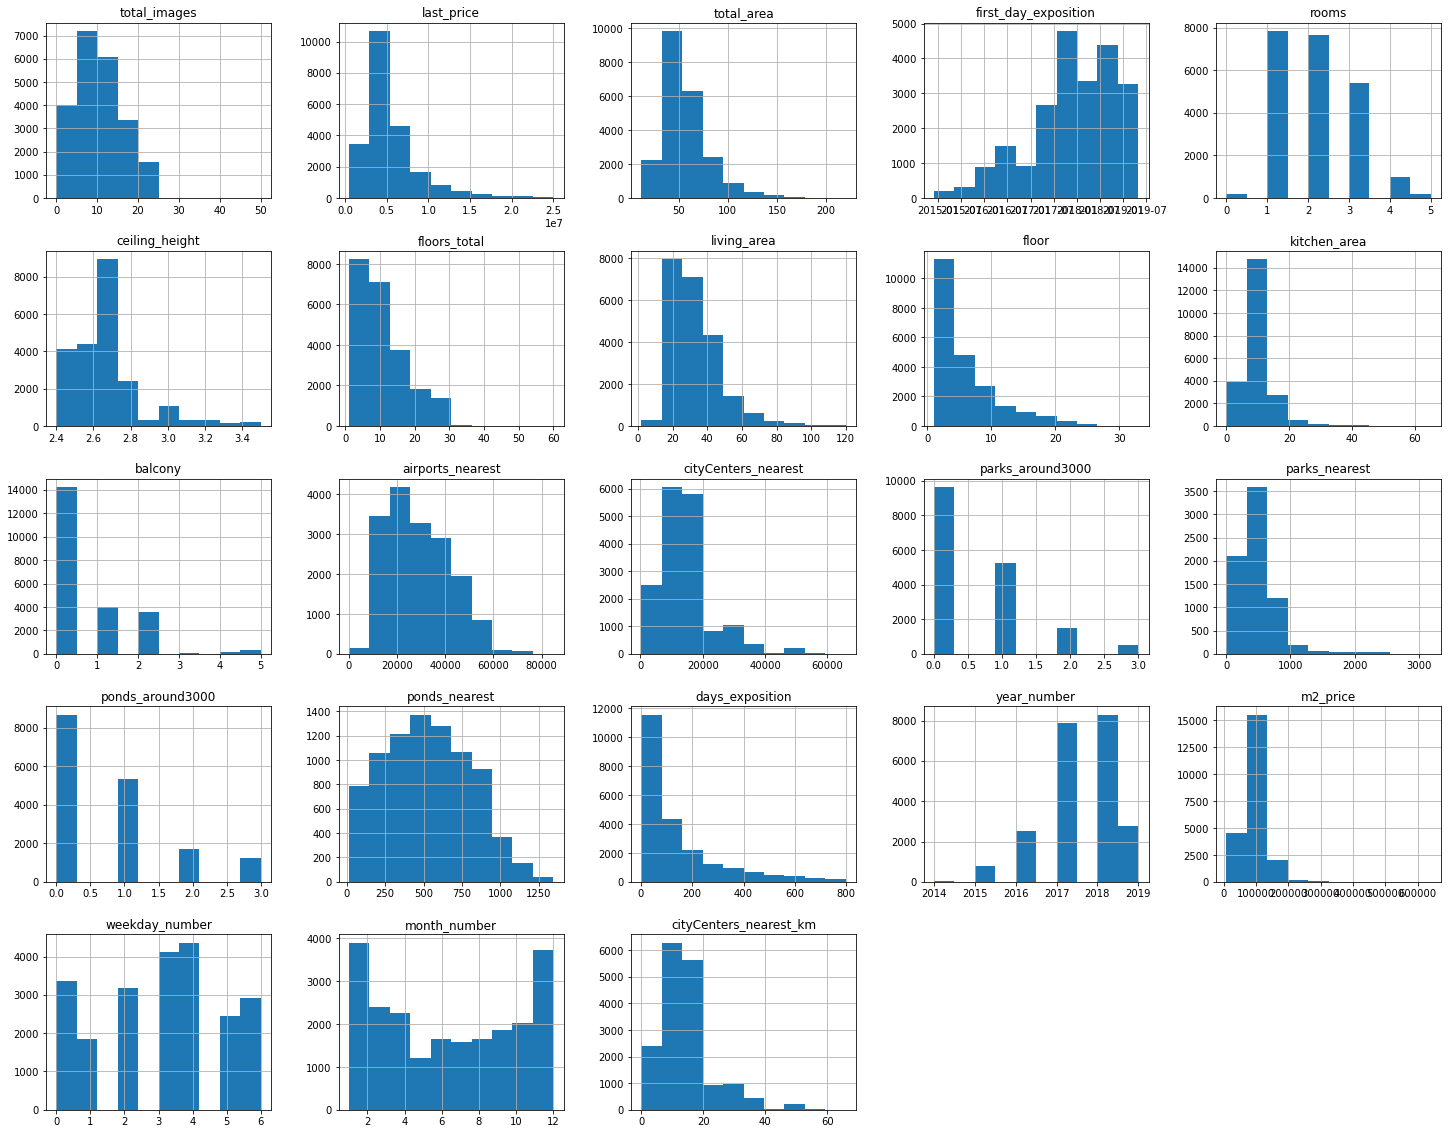

In [237]:
df.hist(figsize = (25,20));

**Гистограммы "растянулись" вправо за счет удаления из датасета аномальных значений. Теперь посмотрим на столбцы по отдельности.**

#### Параметры объекта: общая площадь

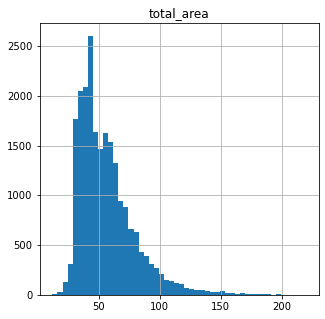

In [238]:
df.hist('total_area', figsize = (5,5), bins = 50);

**Большая часть наблюдений сконцентрирована в диапазоне 35-100 кв.м. с пиком около 50 кв., что соответствует характеристикам датасета, в котором больше всего 1 и 2-комн. квартир:**

In [239]:
 df.pivot_table(index = 'rooms', values = 'total_area', aggfunc = ['count', 'median'])

,count,median
,total_area,total_area
rooms,,
0,192,26.025
1,7849,36.500
2,7645,53.000
3,5404,72.000
4,981,94.100
5,195,124.800


#### Параметры объекта: жилая площадь

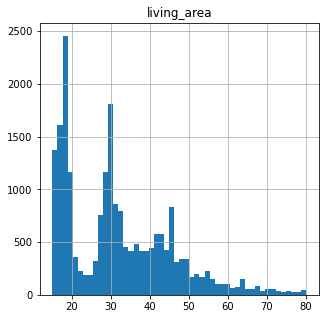

In [240]:
df.hist('living_area', figsize = (5,5), bins = 50, range=(15,80));

**Сократив немного range можем увидеть характерные пики - они соответствуют характерным размерам жилой площади в типовых объектах с разным числом комнат (1к и студии/комнаты -17-18 кв. м., 2к - 30 кв.м., 3к - 45 кв.м.)**

In [241]:
df.pivot_table(index = 'rooms', values = 'living_area', aggfunc = ['count', 'median'])

,count,median
,living_area,living_area
rooms,,
0,192,18.0
1,7849,17.6
2,7645,30.5
3,5404,45.0
4,981,62.6
5,195,85.1


**Пик наблюдений приходится на 17-18 метровые по общей площади квартиры/комнаты, что не удивительно, т.к. в датасете комнаты/студии/однушки с такой площадью самые популярные**

**Второй пик - характерен для двушек, второй самой популярной по числу объявлений категории.**

#### Параметры объекта:  площадь кухни

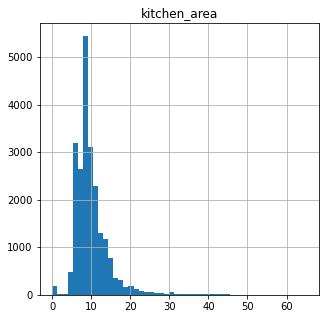

In [242]:
df.hist('kitchen_area', figsize = (5,5), bins = 50);

**Самый левый столбик на графике - объекты со значениями 0, т.е. комнаты или студии.**

**В целом распределение достаточно симметричное, с самым "популярным" размером кухни около 9 кв.м**

In [243]:
df.pivot_table(index = 'rooms', values = 'kitchen_area', aggfunc =  'median')

,kitchen_area
rooms,
0,0.00
1,9.04
2,8.80
3,9.50
4,11.00
5,14.00


#### Параметры объекта: цена объекта

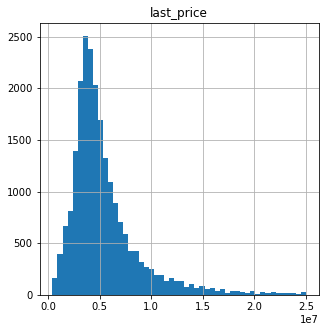

In [244]:
df.hist('last_price', figsize = (5,5), bins = 50);


**Достаточно симметричное распределение, с наибольшей частотой объявлений с ценой около 4,6-4,7 млн. руб.**

**Квартир / объектов с ценой более 10 млн. руб. мало**

#### Параметры объекта: количество комнат

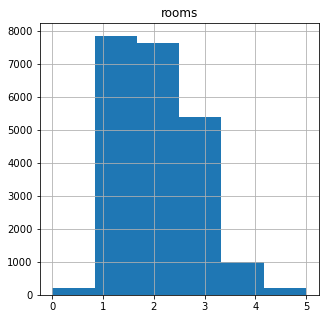

In [245]:
df.hist('rooms', figsize = (5,5), bins = 6);

**Однушек и двушек в датасете примерно поровну.Затем по популярности идут трешки, далее 4-комнатные квартиры. Комнаты/студии и квартиры с 5 комнатами - значительно уступают по числу объявлений.**

#### Параметры объекта: высота потолков

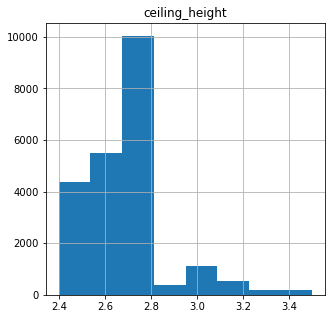

In [246]:
df.hist('ceiling_height', figsize = (5,5), bins = 8);

In [247]:
df['ceiling_height'].median()

2.7

**Пик на графике соответствует медианному значению высоты потолка, это типичные квартиры в панельных домах**. 
**Соседние пики 2,4 м. и 2,8 м.  - видимо хрушевки и новые дома с увеличенной высотой потолка соответственно.**

#### Параметры объекта: этаж квартиры

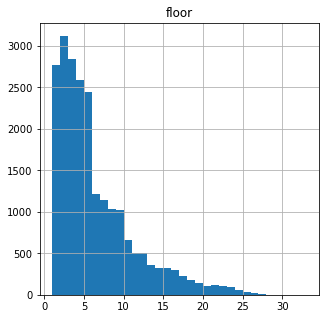

In [248]:
df.hist('floor', figsize = (5,5), bins = 32);

In [249]:
df['floor'].unique()

array([ 8,  1,  4, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15,  9, 18, 10, 19,
       16, 20, 27, 17, 14, 12, 21, 28, 24, 25, 23, 30, 29, 32, 33, 31],
      dtype=int64)

**Большинство объектов расположены до 6 этажа, меньшая часть - до 10 этажа, объектов, расположенных на 25+ этажах практически нет**

#### Параметры объекта: тип этажа квартиры («первый», «последний», «другой»)

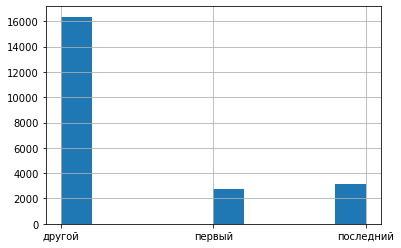

In [250]:
df['floor_type'].hist();

**Абсолютное большинство объектов в анализируемой базе расположены не на 1 и не на последнем этажах**

#### Параметры объекта: расстояние до центра города в метрах


5344

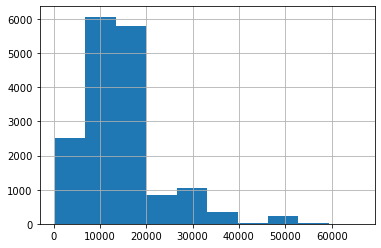

In [251]:
df['cityCenters_nearest'].hist()
df['cityCenters_nearest'].isna().sum()

**У населенных пунктов близость к центру как правило не превышает 20 км. Очевидно при больших значениях близость к центру населенных пунктов пересчитывается относительно других н/п.**

**Надо не забывать, что имеется большое количество пропущенных значений в данных по cityCenters_nearest - 5361**

#### Параметры объекта: расстояние до ближайшего аэропорта;


5362

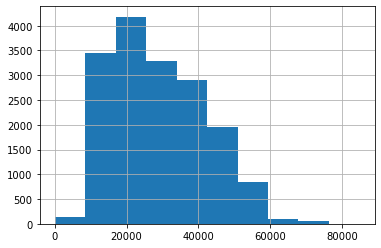

In [252]:
df['airports_nearest'].hist()
df['airports_nearest'].isna().sum()

**Практически все н/п, по которым есть данные, находятся на расстоянии менее 60 км от аэропорта**

#### Параметры объекта: расстояние до ближайшего парка


14985

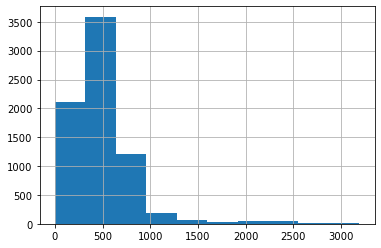

In [253]:
df['parks_nearest'].hist()
df['parks_nearest'].isna().sum()

**Практически все н/п, по которым есть данные, находятся на расстоянии менее 1 км от ближайшего парка**

#### Параметры объекта: день и месяц публикации объявления.

0

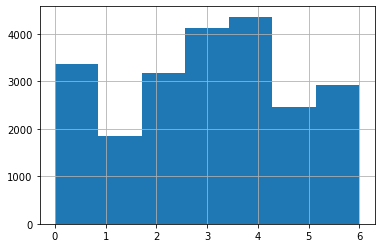

In [254]:
df['weekday_number'].hist(bins = 7)
df['weekday_number'].isna().sum()

**Чаще всего объявления публикуются в четверг (3) и пятницу (4). В субботу (5) и воскресенье (6) число подаваемых объявлений заметно снижается (в выходные все хотят отдыхать)**

0

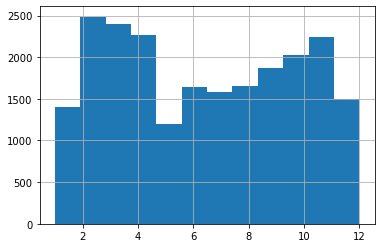

In [255]:
df['month_number'].hist(bins = 12)
df['month_number'].isna().sum()

**В январе, декабре и мае жизнь на рынке жилой недвижимости заметно замедляется, слишком много праздников. Самый активный период - февраль-апрель года. В мае все на шашлыках. Вторая волна активности, менее сильная, начинается в июне**

### Анализ срока экспозиции квартир ('days_exposition')


In [256]:
df['days_exposition'].describe()

count    22266.000000
mean       140.996632
std        158.623013
min          1.000000
25%         33.000000
50%         74.000000
75%        185.000000
max        799.000000
Name: days_exposition, dtype: float64

**Четверть объявлений висят в базе не более месяца, около половины - 2,5 месяца. Лишь 1/4 обявлений висит в базе более полугода.** 

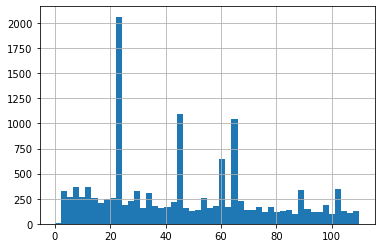

In [257]:
df['days_exposition'].hist(range=(0,110), bins = 50);

In [258]:
df['days_exposition'].value_counts().sort_values(ascending = False)

23     1827
64      972
45      869
60      534
103     286
       ... 
526       1
651       1
696       1
1         1
784       1
Name: days_exposition, Length: 782, dtype: int64

**После уменьшения range вылезли пики, соответствующие значениям "days_exposition" 23 дней, 45 дней, 60 дней, 64 дня и 103 дня.
Для соответствующих срезов посмотрела значения разных параметров, в т.ч. год публикации объявления, состав населенных пунктов, вошедших в срез (есть пересечения между группами), удаленность от центра, цены за кв. м. площади. 
Анализ каких-либо явных закономерностей не показал. Возможно, это какой-то технический момент на стороне платформы.** 
    

In [259]:
#Срезы по медианной стоимости кв. м. особо не отличаются, разве что 2-я группа стоит дешевле в терминах цены за кв.м.
display(df.loc[df['days_exposition']==23, 'm2_price'].median())
display(df.loc[df['days_exposition']==45, 'm2_price'].median())
display(df.loc[df['days_exposition']==60, 'm2_price'].median())
df.loc[df['days_exposition']==64, 'm2_price'].median()

101865.0

74468.0

100674.0

98285.0

In [260]:
#Срезы по медианной общей площади особо не отличаются, наименьшая площадь - у объектов 2 группы
display(df.loc[df['days_exposition']==23, 'total_area'].median())
display(df.loc[df['days_exposition']==45, 'total_area'].median())
display(df.loc[df['days_exposition']==60, 'total_area'].median())
df.loc[df['days_exposition']==64, 'total_area'].median()

53.0

43.0

58.9

61.15

In [261]:
#Срезы по медианной удаленности от центра близки по значениям, немного выделяется 2 группа
display(df.loc[df['days_exposition']==23, 'cityCenters_nearest_km'].median())
display(df.loc[df['days_exposition']==45, 'cityCenters_nearest_km'].median())
display(df.loc[df['days_exposition']==60, 'cityCenters_nearest_km'].median())
df.loc[df['days_exposition']==64, 'cityCenters_nearest_km'].median()

13.0

16.0

13.0

13.0

In [262]:
display(df.loc[df['days_exposition']==23, 'last_price'].median())
display(df.loc[df['days_exposition']==45, 'last_price'].median())
display(df.loc[df['days_exposition']==60, 'last_price'].median())
df.loc[df['days_exposition']==64, 'last_price'].median()
#Срезы по медианной стоимости объекта тоже особо не отличаются, но выделяется 2 группа

5100000.0

3280000.0

5776000.0

5585000.0

**2-я группа (days_exposition = 45) - дальше всех расположенные от центра объекты меньшей площади с меньшей ценой объекта, в т.ч. меньшей стоимостью кв.м. (в сравнению с др. группами)**

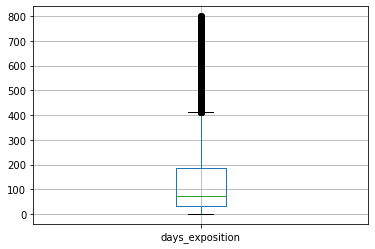

In [263]:
df.boxplot('days_exposition');

**Несмотря на то, что мы убрали из массива объявления со сроком экспозиции более 800 дней, все равно сохраняется длинных хвост объявлений, которые долго "висели". Судя по гистограмме размаха, можно было бы дополнительно исключить наблюдения со значениями days_exposition более 400.** 

,count,median
,days_exposition,days_exposition
rooms,,
0,192,45
1,7849,66
2,7645,74
3,5404,86
4,981,103
5,195,102


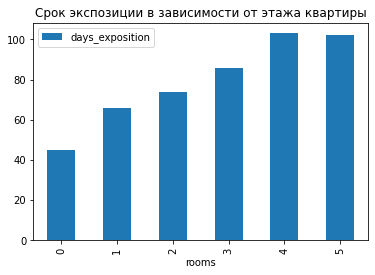

In [264]:
df.pivot_table(index='rooms', values='days_exposition', aggfunc= 'median')\
.plot(kind='bar', title = 'Срок экспозиции в зависимости от этажа квартиры')

df.pivot_table(index='rooms', values='days_exposition', aggfunc=['count','median'])

**Чем больше комнат в квартире, тем больше значение days_exposition, ведь чем больше (и следовательно дороже) квартира, тем сложнее ее продать.**

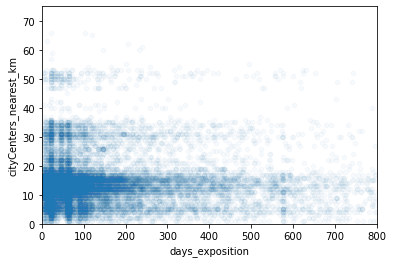

In [265]:
df.plot(x='days_exposition', y='cityCenters_nearest_km', kind='scatter', alpha=0.03, xlim = (0, 800), ylim =(0, 75)); 


**Диаграмма рассеивания говорит о том, что максимальное число объявлений соответствует квартирам с близостью к центру до 20 км. Такие объекты продаются как правило в интервале до 100 дней. При этом чем ближе к центру, тем короче days_exposition. Далеко расположенных от центра объектов относительно мало.** 

,days_exposition
floor_type,
другой,70
первый,90
последний,82


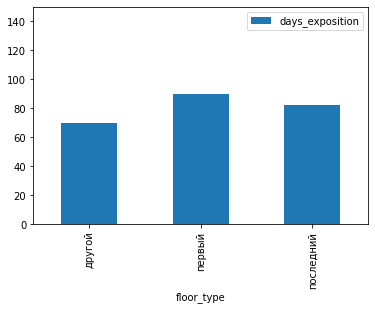

In [266]:
df.pivot_table(index = 'floor_type', values= 'days_exposition', aggfunc='median').plot(kind = 'bar', ylim = (0,150))
df.pivot_table(index = 'floor_type', values= 'days_exposition', aggfunc='median')

**Объявления по квартирам не на 1 и не на последнем этаже имеют самый короткий срок days_exposition. Дольше всего висят объявления с квартирами на 1 этаже.**

,count,median
,days_exposition,days_exposition
year_number,,
2014,47,594.0
2015,788,470.5
2016,2497,216.0
2017,7881,103.0
2018,8282,64.0
2019,2771,23.0


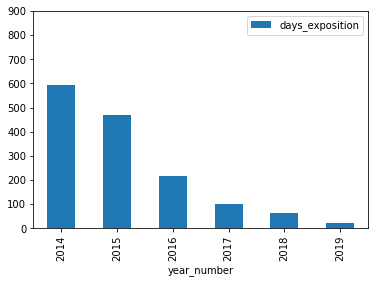

In [267]:
df.pivot_table(index = 'year_number', values= 'days_exposition', aggfunc='median').plot(kind = 'bar', ylim = (0,900))
df.pivot_table(index = 'year_number', values= 'days_exposition', aggfunc=['count', 'median'])

**Согласно графику продажи квартир заметно ускоряются в рамках анализируемого периода (days_exposition снижается).**
**Предположим, что либо население все больше верит в недвижимость как средство сохранения своих сбережений, либо развивается система продаж квартир и объекты быстрее находят своего владельца, либо развитие ипотеки помогло увеличить спрос на рынке**

,days_exposition
month_number,
1,69.0
2,64.0
3,57.0
4,53.0
5,115.0
6,103.0
7,85.0
8,76.0
9,80.0


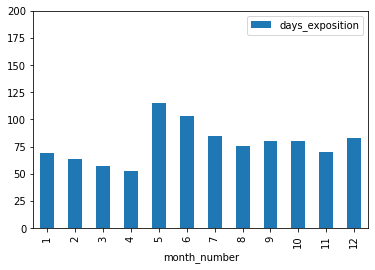

In [268]:
df.pivot_table(index = 'month_number', values= 'days_exposition', aggfunc='median').plot(kind = 'bar', ylim = (0,200))
df.pivot_table(index = 'month_number', values= 'days_exposition', aggfunc='median')

**Можно предположить, что начало года (январь -апрель) - высокий сезон на рынке недвижимости. С мая срок экспозиции увеличивается (начало "дачного сезона")**

days_exposition
year_number month_number                 
2014        11                      583.0
            12                      600.5
2015        1                       576.0
            2                       584.0
            3                       516.0
            4                       495.0
            5                       522.0
            6                       512.0
            7                       470.0
            8                       482.0
            9                       409.5
            10                      350.5
            11                      410.5
            12                      303.5
2016        1                       262.0
            2                       211.0
            3                       197.0
            4                       156.0
            5                       115.0
            6                       103.0
            7                       287.0
            8                       382.5
            9                       433.0
            10                      443.0
            11                      409.5
            12                      392.0
2017        1                       168.0
            2                       129.5
            3                       328.5
            4                       126.0
            5                       110.0
            6                       119.0
            7                       105.0
            8                       103.0
            9                       103.0
            10                      102.0
            11                       74.0
            12                       67.0
2018        1                        64.0
            2                        68.0
            3                        66.0
            4                        93.0
            5                       131.0
            6                        74.0
            7                        64.0
            8                        64.0
            9                        63.0
            10                       60.0
            11                       61.5
            12                       64.0
2019        1                        23.0
            2                        23.0
            3                        23.0
            4                        23.0
            5                        23.0

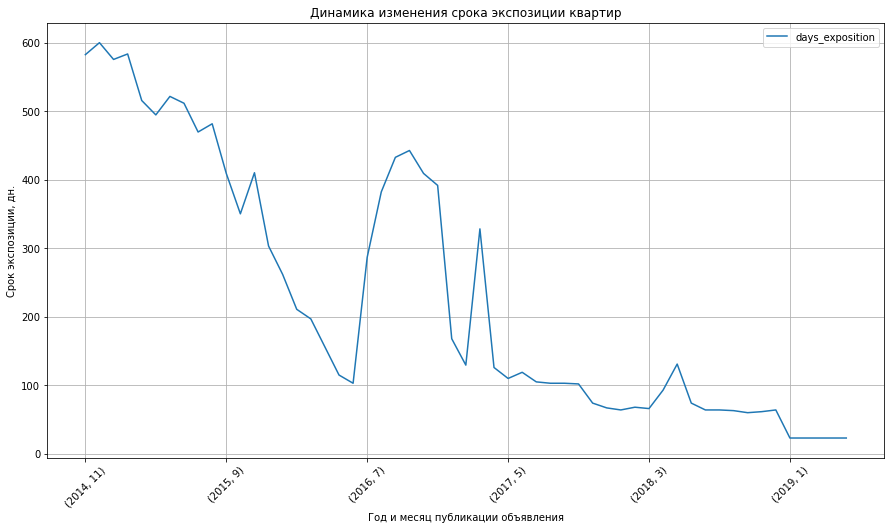

In [269]:
df.pivot_table(index = ['year_number','month_number'], values= 'days_exposition', aggfunc='median')\
    .plot(figsize = (15,8), rot= 45, \
          title = 'Динамика изменения срока экспозиции квартир', ylabel = "Срок экспозиции, дн.", \
          xlabel = "Год и месяц публикации объявления")
plt.grid(True)
df.pivot_table(index = ['year_number','month_number'], values= 'days_exposition', aggfunc='median')

**Видно как год от года days_exposition снижается, при этом внутри годовых отрезков есть локальные пики**

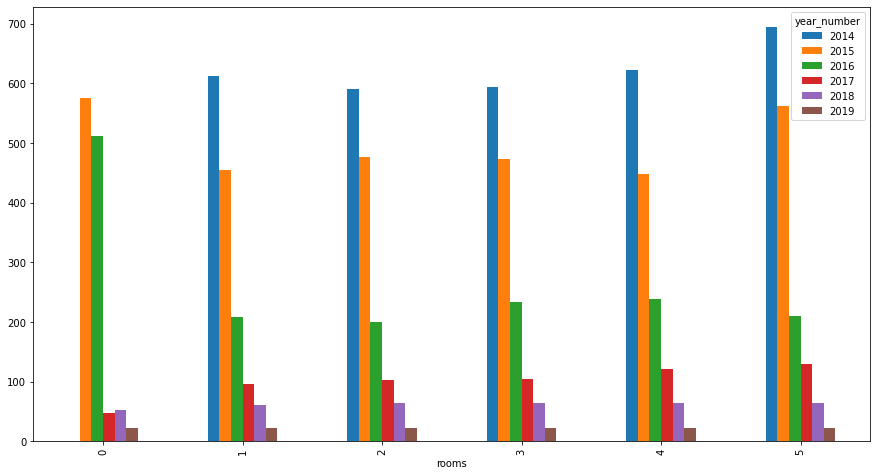

In [270]:
df.pivot_table(index ='rooms', columns = 'year_number', values= 'days_exposition', aggfunc = 'median')
df.pivot_table(index ='rooms', columns = 'year_number', values= 'days_exposition', aggfunc = 'median').\
    plot(kind = 'bar', figsize = (15,8));

**Тут никаких интересных зависимостей не наблюдается: days_exposition год от года снижается, при этом кол-во комнат в  квартире на характер этого снижения не влияет.**

***Таким образом, мы выяснили, что быстрее продаются квартиры:***
    
- расположенные ближе к центру города
- небольшого размера
- не на первом и не на последем этажах
- объявление о продаже которых появляется в начале года (январь-апрель)
- при этом чем позже квартира появилась в базе, тем короче срок экспозиции
    
***Как показал анализ, четверть объявлений висят в базе не более 1 месяца, около половины - 2,5 месяца. Лишь 1/4 объявлений висит в базе более полугода.***

### Анализ факторов, влияющих на общую (полную) стоимость объекта ('last_price')


**Посмотрим, зависит ли цена от:**
 - общей площади;
 - жилой площади;
 - площади кухни;
 - количества комнат;
 - этажа, на котором расположена квартира (первый, последний, другой);
 - даты размещения (день недели, месяц, год).

**Построим графики, которые покажут зависимость цены от указанных выше параметров.**

0.7750423643019096

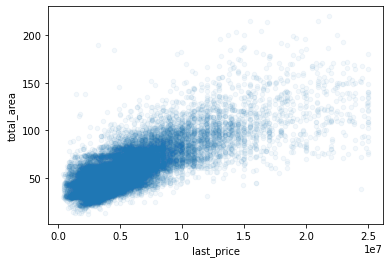

In [271]:
df.plot(x='last_price', y='total_area', kind='scatter', alpha=0.05) 
df['last_price'].corr(df['total_area'])

**Налицо сильная корреляция между ценой объекта и общей площадью квартиры, что соответствует здравому смыслу: чем больше квартира, тем она дороже.** 

0.630179823554037

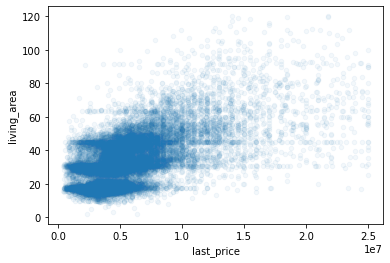

In [272]:
df.plot(x='last_price', y='living_area', kind='scatter', alpha=0.05) 
df['last_price'].corr(df['living_area'])

**Здесь тоже прослеживается связь: чем больше жилая площадь, тем выше цена. При этом здесь отчетливо различаются определенные группы, характерные для квартир с разным числом комнат. Есть концентрация значений для комнат/студий площадью 17-18 кв. м, группа значений, характерная для жилой площади около 30 кв. м.(1к. квартиры), а также группа значений с концентрацией значений около 50 кв. м. Для каждой группы характерен определенный разброс цены. Все что больше 50 кв. м  - и цена выше, и вариация цен шире.** 

0.630179823554037

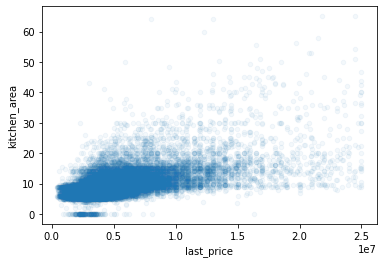

In [273]:
df.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.05) 
df['last_price'].corr(df['living_area'])

**Положительная корреляция прослеживается, но гораздо менее сильная, чем прослеживается для факторов total_area и living_area** 

0.4785427252921468

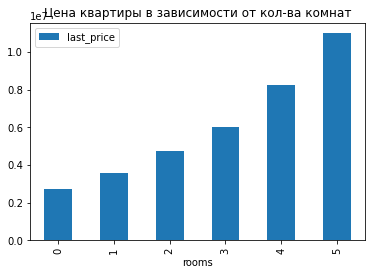

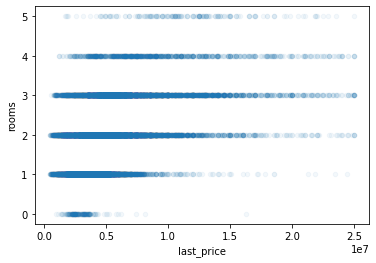

In [274]:
df.pivot_table(index='rooms', values='last_price', aggfunc='median')\
.plot(kind='bar', title = 'Цена квартиры в зависимости от кол-ва комнат')
df.plot(x='last_price', y='rooms', kind='scatter', alpha=0.05) 
df['last_price'].corr(df['rooms'])

**Очевидно, что чем больше комнат в квартире (и соответственно больше общая площадь), тем выше цена. При этом на диаграмме рассеивания видно, что разброс цен на комнаты/студии невысокий. С ростом количества комнат в объекте растет и средняя цена, и разброс цен увеличивается** 

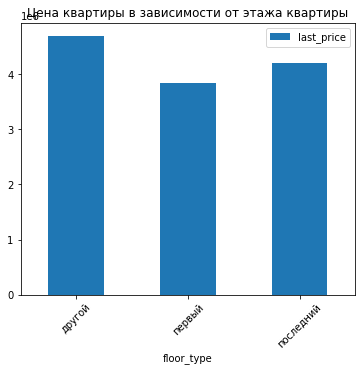

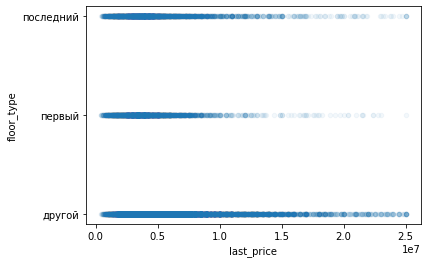

In [275]:
df.pivot_table(index='floor_type', values='last_price', aggfunc='median')\
.plot(kind='bar', title = 'Цена квартиры в зависимости от этажа квартиры', figsize = (6,5), rot = 45)
plt.show()
df.plot(x='last_price', y='floor_type', kind='scatter', alpha=0.05); 

**Медианная цена на квартиры не на 1 и не на последнем этажах выше. Самая низкая цена на квартиры на 1 этаже.**
**При этом вариация цен на квартиры на 1 этаже значительно меньше, чем на квартиры, расположенные на других этажах**

,last_price
year_number,
2014,7265000
2015,4990000
2016,4400000
2017,4400000
2018,4500000
2019,4990000


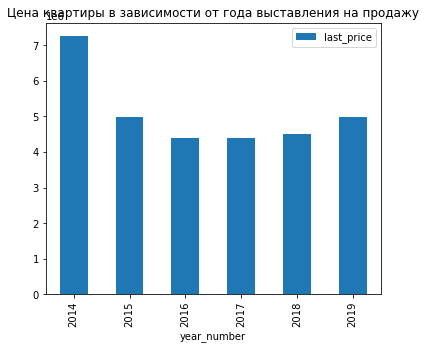

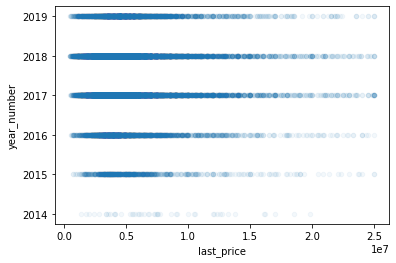

In [276]:
display(df.pivot_table(index='year_number', values='last_price', aggfunc='median'))
df.pivot_table(index='year_number', values='last_price', aggfunc='median')\
.plot(kind='bar', title = 'Цена квартиры в зависимости от года выставления на продажу', figsize = (6,5))
plt.show()

df.plot(x='last_price', y='year_number', kind='scatter', alpha=0.05);

**Если не рассматривать 2014г, за который имеются всего 2 месяца наблюдений, то в целом медианная цена объектов в период 2015-2019 находятся на стабильном уровне - около 4,5 млн. руб.**

**При этом отмечается тенденция к снижению разброса цен в 2019г. в сравнении с 2017 и 2018**

,last_price
month_number,
1,4500000
2,4550000
3,4518500
4,4700000
5,4499500
6,4300000
7,4500000
8,4500000
9,4599000


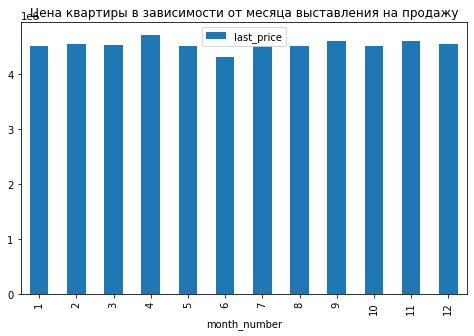

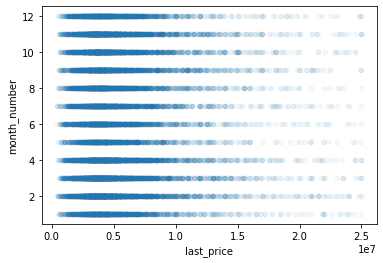

In [277]:
display(df.pivot_table(index='month_number', values='last_price', aggfunc='median'))
df.pivot_table(index='month_number', values='last_price', aggfunc='median')\
.plot(kind='bar', title = 'Цена квартиры в зависимости от месяца выставления на продажу', figsize = (8,5))
plt.show()

df.plot(x='last_price', y='month_number', kind='scatter', alpha=0.05);

**Зависимость цены объекта от месяца выставления квартиры на продажу отсутствует**

,last_price
weekday_number,
0,4600000
1,4550000
2,4500000
3,4400000
4,4600000
5,4580000
6,4490000


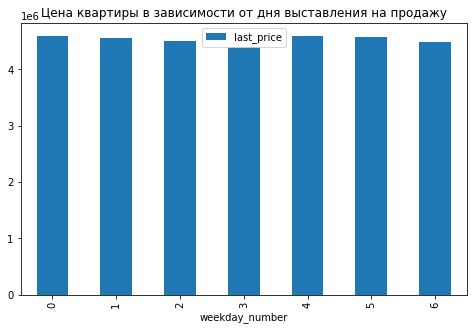

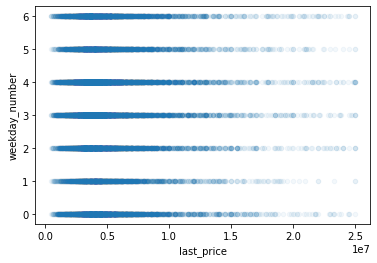

In [278]:
display(df.pivot_table(index='weekday_number', values='last_price', aggfunc='median'))
df.pivot_table(index='weekday_number', values='last_price', aggfunc='median')\
.plot(kind='bar', title = 'Цена квартиры в зависимости от дня выставления на продажу', figsize = (8,5))
plt.show()

df.plot(x='last_price', y='weekday_number', kind='scatter', alpha=0.05);

**Зависимость цены объекта от дня выставления квартриры на продажу также отсутствует**

***По итогам проведенного анализа зависимости цены объекта от таких факторов, как общая площадь, жилая площадь, площадь кухни, количество комнат, этаж, на котором расположена квартира (первый, последний, другой), а также даты размещения (день недели, месяц, год), можно заключить, что цена объекта максимально зависит от параметров, характеризующих размер объекта, т.е. общая площадь, жилая площадь, в меньшей степени площадь кухни. Также квартиры не на первом и не последнем этаже дороже. Медианная цена объектов за анализируемый период существенно не изменилась.***

### Средняя стоимость кв.м. в самых популярных н/п

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и самой низкой стоимостью квадратного метра.

In [279]:
# Сгруппируем данные по населенному пункту, для каждого посчитаем количество строк (==объявлений) и отсортируем их по убыванию
df1 = df.pivot_table(index = 'locality_name', values = 'm2_price', aggfunc = ['count', 'median'])
df1.columns= ['ads_number', 'median_price_per_m2']
df1['median_price_per_m2'] = df1['median_price_per_m2'].astype(int)
df1

,ads_number,median_price_per_m2
locality_name,,
unknown,46,88579
Бокситогорск,1,19231
Волосово,34,39643
Волхов,111,35000
Всеволожск,385,65789
...,...,...
ст Лесная Поляна,1,22581
ст Новая Ропша,1,81081
ст Приладожский,1,44167


In [280]:
df_by_count = df1.sort_values('ads_number', ascending = False)
df_by_count.head(10)

,ads_number,median_price_per_m2
locality_name,,
Санкт-Петербург,14540,103922
поселок Мурино,543,86076
поселок Шушары,432,76748
Всеволожск,385,65789
Пушкин,344,99725
Колпино,333,74658
поселок Парголово,321,91517
Гатчина,296,67861
деревня Кудрово,290,91735


**Абсолютным лидером по числу объявлений является Санкт-Петербург - 14540 объявлений, более 60% датасета.**
**В топ-10 населенных пунктов с максимальным кол-вом объявлений у СПБ также и максимальная стоимость за кв. м.** 

In [281]:
df_by_median_price = df1.sort_values('median_price_per_m2', ascending = False)
df_by_median_price.head(10)

,ads_number,median_price_per_m2
locality_name,,
поселок Лисий Нос,2,113728
Санкт-Петербург,14540,103922
Зеленогорск,24,101666
Кудрово,171,100000
Сестрорецк,175,99917
Пушкин,344,99725
поселок Левашово,1,96998
деревня Кудрово,290,91735
поселок Парголово,321,91517


In [282]:
max_price = df1['median_price_per_m2'].max()
min_price = df1['median_price_per_m2'].min()

In [283]:
df1.query('median_price_per_m2==@max_price')

,ads_number,median_price_per_m2
locality_name,,
поселок Лисий Нос,2,113728


In [284]:
df1.query('median_price_per_m2==@min_price')

,ads_number,median_price_per_m2
locality_name,,
деревня Старополье,3,11000


**Населенный пункт с самой высокой стоимостью кв. м. жилой недвижимости - поселок Лисий Нос	 (113 122 руб./кв.м). 
Если верить Яндексу, то Лисий Нос — название мыса в северной части Невской губы. Находится между Питером и Сестрорецком. Не город, не деревня. Раньше называли «поселок городского типа», сейчас, скорее, «коттеджный» поселок. До города – 10 мин. На машине. Есть все городские удобства, или, по крайней мере, возможность их сделать, но есть и природа, и море, и сосны, которые так нравятся соскучившимся по свежему воздуху горожанам.Редкий объект (всего 2 предложения) и дорогой. Фото понравились. :)**

**Самый дешевый вариант - деревня Старополье (11 000 руб/ кв.м.)**

**Таким образом, выборка топ-10 городов с максимальным количеством объявлений очень неоднородна: число объявлений в СПБ сильно превышает количество объявлений в других самых популярных населенных пунктах. При этом медианная стоимость кв. м. в СПБ (109 528 руб.) незначительно ниже стоимости кв. м. в самом дорогом н/п поселке Лисий нос (113 728 руб.). Самым дешевым н/п в выборке является деревня Старополье - всего 3 объявления со средней стоимостью кв.м. 11000.**

### Средняя стоимость кв.м. в СПБ  в зависимости от расстояния до центра

Чтобы определить, как стоимость объектов жилой недвижимости зависит от расстояния до центра города, вычислим среднюю цену каждого километра удаленности от центра для объектов в СПБ. 

In [285]:
df['cityCenters_nearest']

0        16028.0
1        18603.0
2        13933.0
4         8098.0
5            NaN
          ...   
23693    34104.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: cityCenters_nearest, Length: 22266, dtype: float64

In [286]:
df['cityCenters_nearest_km']

0        16.0
1        19.0
2        14.0
4         8.0
5         NaN
         ... 
23693    34.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_nearest_km, Length: 22266, dtype: float64

In [287]:
# Оценим кол-во пропусков в переменной 'cityCenters_nearest'
df.loc[(df['locality_name']=='Санкт-Петербург') & (df['cityCenters_nearest'].isna())].count()[0]

48

**Сначала нужно заполнить эти 48 пропусков - заполним их медианным значением переменной 'cityCenters_nearest' для Санкт-Петербурга:**

In [288]:
df.loc[(df['locality_name']=='Санкт-Петербург') & (df['cityCenters_nearest'].isna()),'cityCenters_nearest'] = \
df.loc[(df['locality_name']=='Санкт-Петербург'),'cityCenters_nearest'].median()
df['cityCenters_nearest'].head()

0    16028.0
1    18603.0
2    13933.0
4     8098.0
5        NaN
Name: cityCenters_nearest, dtype: float64

In [289]:
df.loc[~df['cityCenters_nearest'].isna(), 'cityCenters_nearest_km'] = \
    round(df.loc[~df['cityCenters_nearest'].isna(), 'cityCenters_nearest']/1000)
df['cityCenters_nearest_km'].head()

0    16.0
1    19.0
2    14.0
4     8.0
5     NaN
Name: cityCenters_nearest_km, dtype: float64

In [290]:
df.loc[df['locality_name'] == 'Санкт-Петербург']\
    .groupby('cityCenters_nearest_km')['last_price'].mean().round(1)

cityCenters_nearest_km
0.0      9454444.4
1.0     10449852.9
2.0     10234107.0
3.0      9030462.5
4.0      9507495.2
5.0      9855349.9
6.0      8753207.0
7.0      8489986.5
8.0      8437717.7
9.0      6576029.3
10.0     6221879.7
11.0     5868549.3
12.0     5753430.9
13.0     6077059.1
14.0     5589668.7
15.0     5734849.6
16.0     5338021.1
17.0     5161125.4
18.0     4901903.3
19.0     4974679.5
20.0     5990037.0
21.0     5486130.0
22.0     5417591.6
23.0     4695207.3
24.0     3854429.6
25.0     4088953.5
26.0     3973012.5
27.0     8300000.0
28.0     5026428.6
29.0     4050000.0
Name: last_price, dtype: float64

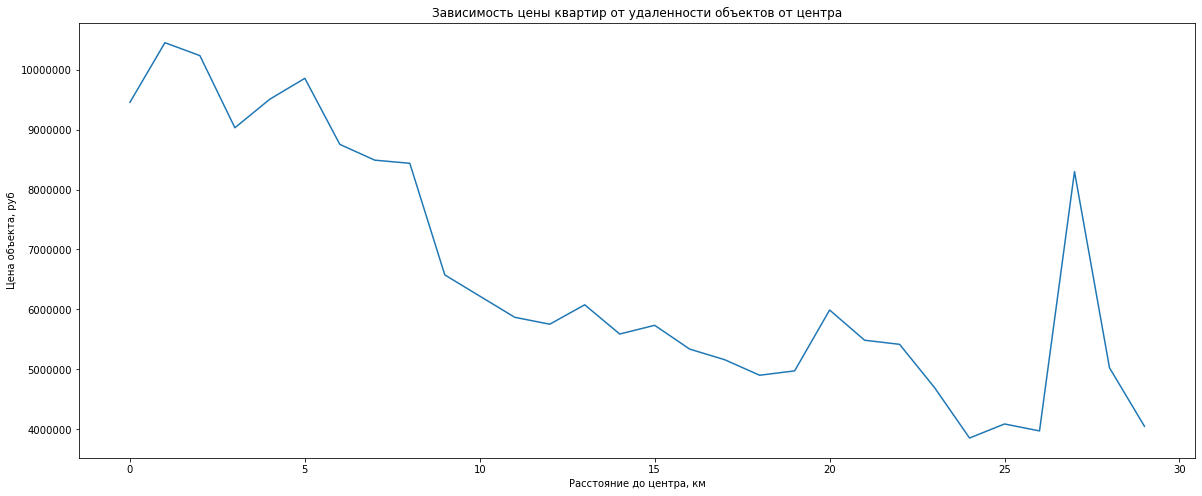

In [291]:
plt.show();
plt.ticklabel_format(style = 'plain')
df.loc[df['locality_name'] == 'Санкт-Петербург']\
    .groupby('cityCenters_nearest_km')['last_price'].mean()\
    .plot(figsize = (20, 8), title = 'Зависимость цены квартир от удаленности объектов от центра', \
          ylabel = 'Цена объекта, руб', xlabel = 'Расстояние до центра, км');


In [292]:
df.loc[df['locality_name']=='Санкт-Петербург',['cityCenters_nearest_km', 'cityCenters_nearest', 'm2_price']]

,cityCenters_nearest_km,cityCenters_nearest,m2_price
0,16.0,16028.0,120370
2,14.0,13933.0,92786
4,8.0,8098.0,100000
7,12.0,11634.0,110545
9,15.0,15008.0,88525
...,...,...,...
23688,14.0,14428.0,91089
23689,16.0,16081.0,100567
23690,6.0,6263.0,105769
23691,4.0,4489.0,129904


In [293]:
df.loc[df['locality_name']=='Санкт-Петербург']['cityCenters_nearest'].isna().sum()

0

**Все пропуски заполнены медианным значением по переменной cityCenters_nearest**

In [294]:
# Вынесем данные по СПБ в отдельный массив
df_spb=df.query('locality_name == "Санкт-Петербург"')
df_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_number,m2_price,weekday_number,month_number,floor_type,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,23,2019,120370,4,3,другой,16.0
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.3,4,False,...,90.0,2.0,574.0,558,2015,92786,5,8,другой,14.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121,2018,100000,4,6,другой,8.0
7,5,7915000,71.60,2019-04-18,2,2.70,24,30.5,22,False,...,NaN,0.0,NaN,23,2019,110545,0,4,другой,12.0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.6,7,False,...,NaN,0.0,NaN,289,2017,88525,2,2,другой,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000,101.00,2019-04-01,3,3.05,15,63.0,12,False,...,NaN,0.0,NaN,23,2019,91089,0,4,другой,14.0
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.3,4,False,...,353.0,2.0,652.0,29,2018,100567,3,2,другой,16.0
23690,3,5500000,52.00,2018-07-19,2,2.70,5,31.0,2,False,...,300.0,0.0,NaN,15,2018,105769,6,7,другой,6.0
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,NaN,1.0,806.0,519,2016,129904,5,10,другой,4.0


In [295]:
df_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14540 entries, 0 to 23697
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            14540 non-null  int64         
 1   last_price              14540 non-null  int32         
 2   total_area              14540 non-null  float64       
 3   first_day_exposition    14540 non-null  datetime64[ns]
 4   rooms                   14540 non-null  int64         
 5   ceiling_height          14540 non-null  float64       
 6   floors_total            14540 non-null  int32         
 7   living_area             14540 non-null  float64       
 8   floor                   14540 non-null  int64         
 9   is_apartment            14540 non-null  bool          
 10  studio                  14540 non-null  bool          
 11  open_plan               14540 non-null  bool          
 12  kitchen_area            14540 non-null  float6

In [296]:
pd.options.mode.chained_assignment = None

df_spb['cityCenters_nearest_km'] = df_spb['cityCenters_nearest_km'].astype('int')
df_spb['cityCenters_nearest'] = df_spb['cityCenters_nearest'].astype('int')

**Срез по СПБ по используемым переменным не имеет пропущенных значений**

In [297]:
df_spb[['last_price', 'cityCenters_nearest', 'cityCenters_nearest_km']]

,last_price,cityCenters_nearest,cityCenters_nearest_km
0,13000000,16028,16
2,5196000,13933,14
4,10000000,8098,8
7,7915000,11634,12
9,5400000,15008,15
...,...,...,...
23688,9200000,14428,14
23689,3550000,16081,16
23690,5500000,6263,6
23691,9470000,4489,4


In [298]:
df_spb['price_km'] =round(df_spb['last_price'] / df_spb['cityCenters_nearest_km'])
df_spb['price_km'].median()

428397.5

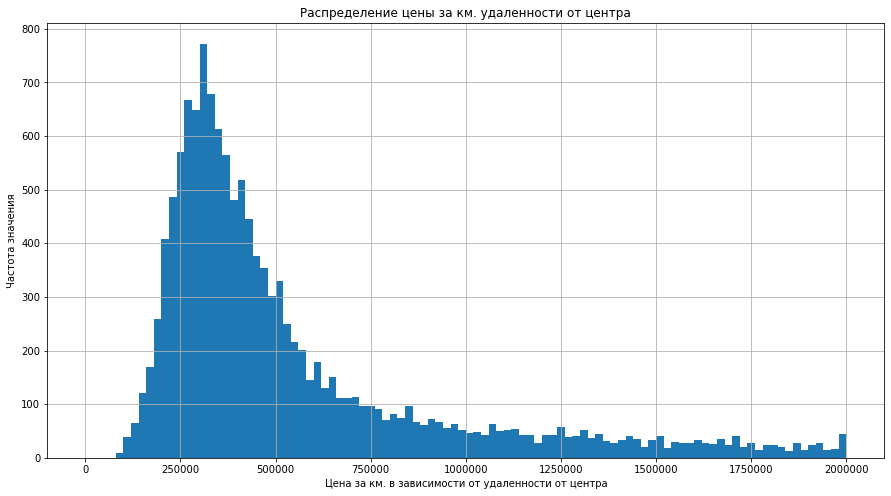

In [299]:
plt.show()
plt.ticklabel_format(style = 'plain');
round(df_spb['price_km']).hist( bins = 100, range=(0,2000000), figsize=(15,8));
plt.title('Распределение цены за км. удаленности от центра');
plt.xlabel('Цена за км. в зависимости от удаленности от центра');
plt.ylabel('Частота значения');

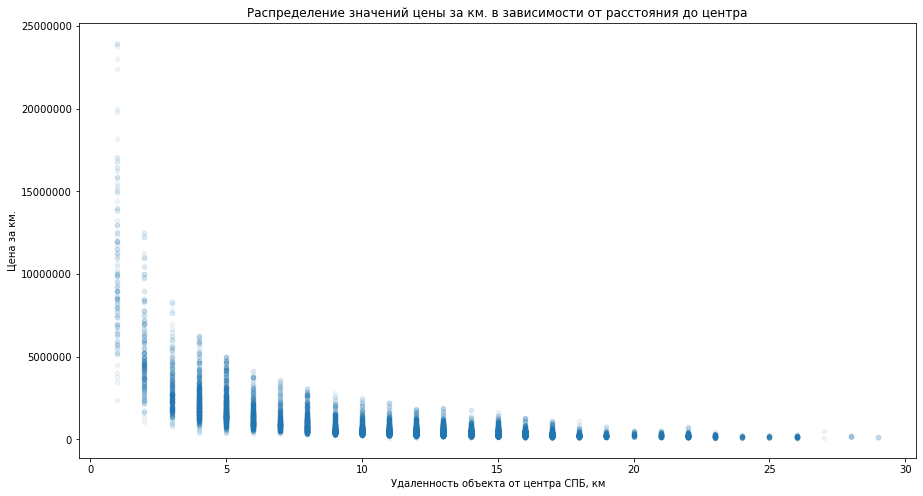

In [300]:
plt.show()
df_spb.sort_values('cityCenters_nearest_km')\
.plot(x='cityCenters_nearest_km', y='price_km',  figsize=(15,8), kind = 'scatter', alpha = 0.07);
plt.ticklabel_format(style = 'plain');
plt.title('Распределение значений цены за км. в зависимости от расстояния до центра');
plt.xlabel('Удаленность объекта от центра СПБ, км');
plt.ylabel('Цена за км.');

**Таким образом, чем ближе к центру города, тем больше вариация по стоимости километра удаленности от центра. По мере удаления от центра стоимость километра стабилизируется, а разброс значений снижается. Очевидно, это связано с тем, что в центре меньше продаж объектов недвижимости (до 3-5км), из-за этого наблюдаем разброс цены. Но дальше цена стабилизируется**

### Общий вывод

**Задача исследования заключалась в том, чтобы проведя предобработку и изучение архивных данных по объявленям о продаже недвижимости в Санкт-Петербурге, найти интересные особенности и зависимости, которые существуют на рынке жилой недвижимости города.**

**Исследование проводилось в несколько этапов:** 
- было изучено качество данных в массиве, проанализированы пропуски и выбран метод их обработки (решалось, убрать такие наблюдения из анализа или предложить адекватный способ их заполнения)
- найдены явные / неявные дубликаты
- изменены типы переменных там где это было целесообразно
- было изучено распределение значений каждого параметра данных, где необходимо избавились от аномальных значений, чтобы не исказить результаты
- рассчитаны дополнительные параметры/метрики, которые целесообразны в рамках поставленной задачи
- был проведен анализ взаимосвязей между отдельными показателями, в частности определены те параметры, которые оказывают максимальный эффект на стоимость квартиры и могут буть использованы для построения прогнозной модели определения стоимости квартиры



**Основные наблюдения и выводы по итогам проведенного анализа:** 
- массив для анализа включает объявления о продаже объектов недвижимости за несколько лет, в т.ч полные 2015-2018гг., последний месяц 2014г. и 2 мес. 2019г. 
- значительное количество пропусков в данных было заполнено, чаще всего при помощи группировки, медианным значением по выбранным группам
- из анализа были исключены аномальные значения в ряде переменных, при этом потеря данных составила не более 6% от исходного размера данных датасета.
- в процессе анализа было выявлено, что максимальное влияние на цену объекта оказывает его общая площадь, а также иные параметры которые косвенно имеют тот же смысл (жилая площадь, кол-во комнат)
- квартиры не на 1 и не на последнем этажах имеют более высокую стоимость и более короткий срок экспозиции
- по мере удаления объекта от центра города снижается не только непосредственно стоимость квадратного метра жилья, но и разброс колебаний стоимости квадратного метра
- объявления, опубликованные в начале года, в целом быстрее "отрабатывают", срок экспозиции таких объектов короче; день подачи объявления значения не имеет
- в рамках анализируемого периода наблюдается сокращение срока экспозиции объектов, причиной чему может быть целый ряд экономических факторов
- четверть объявлений висят в базе не более 1 месяца, около половины - 2,5 месяца. Лишь 1/4 объявлений висит в базе более полугода.
- в представленной базе объявлений самым популярным населенным пунктом является Санкт-Петербург. При этом самый дорогой кв. м. - не в СПб, а в поселке Лисий Нос. 
- в части СПБ отмечается значительный разброс стоимости километра удаленности от центра и фактически стабильная цена километра удаленности для более отдаленных от центра города объектов.** 